In [1]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv(r"C:\Users\tomarx\Desktop\pipeline test.csv")

In [25]:
df.head()

,YEA_PER,AMT_OPN,AMT_ADD,AMT_DLT,AMT_LST,AMT_REM,AMT_WON
1,2017-01-01,1324.0,0.0,0.00,0.0,0.0,0.0
2,2017-01-01,0.0,0.0,3447.85,0.0,0.0,0.0
3,2017-01-01,230.0,0.0,0.00,0.0,0.0,0.0
6,2017-01-01,2100.0,0.0,5222.36,0.0,0.0,0.0
8,2017-01-01,0.0,0.0,587.00,0.0,0.0,0.0


In [39]:
df = data[data['CURCY_CD_TO']=='GBP']
df.drop(columns=['DIV_CHA', 'POS_DIV', 'POS_TEA', 'POS_EMP', 'REV_PRO','PRD_FAM', 'REV_CLS', 'CUS_SEG', 'PIP_STA','CURCY_CD_TO'],inplace=True)
df['YEA_PER'] = pd.to_datetime(df['YEA_PER'])

C:\Users\tomarx\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-39-9559455b53d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEA_PER'] = pd.to_datetime(df['YEA_PER'])


In [42]:
df.head()

,YEA_PER,Type,Value
0,2017-01-01,AMT_OPN,1324.0
1,2017-01-01,AMT_OPN,0.0
2,2017-01-01,AMT_OPN,230.0
3,2017-01-01,AMT_OPN,2100.0
4,2017-01-01,AMT_OPN,0.0


In [41]:
df = df.melt(id_vars=['YEA_PER'], 
        var_name="Type", 
        value_name="Value")

In [49]:
df = df.groupby(['YEA_PER','Type'])[['Value']].sum().reset_index()

In [51]:
df = df.rename(columns={'YEA_PER': 'ds', 'Value':'y'})
df.head()

,ds,Type,y
0,2017-01-01,AMT_ADD,1.378113e+06
1,2017-01-01,AMT_DLT,7.549316e+05
2,2017-01-01,AMT_LST,3.244570e+05
3,2017-01-01,AMT_OPN,9.351587e+06
4,2017-01-01,AMT_REM,1.367173e+06


In [75]:
df_train = df[df['ds']<='2020-12-01']
#df_train[df_train['ds']=='2020-12-01']
df_train.head()

,ds,Type,y
0,2017-01-01,AMT_ADD,1.378113e+06
1,2017-01-01,AMT_DLT,7.549316e+05
2,2017-01-01,AMT_LST,3.244570e+05
3,2017-01-01,AMT_OPN,9.351587e+06
4,2017-01-01,AMT_REM,1.367173e+06


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

,ds,yhat_AMT_ADD,yhat_AMT_DLT,yhat_AMT_LST,yhat_AMT_OPN,yhat_AMT_REM,yhat_AMT_WON
0,2017-01-01,1.607113e+06,8.434734e+05,5.835532e+05,1.095573e+07,1.729355e+06,3.858933e+05
1,2017-02-01,2.119157e+06,1.756702e+06,1.024071e+06,1.103703e+07,2.088432e+06,3.991706e+05
2,2017-03-01,2.442282e+06,2.209507e+06,1.293085e+06,1.142821e+07,2.697421e+06,5.290789e+05
3,2017-04-01,2.370653e+06,1.899208e+06,9.668588e+05,1.143681e+07,2.280290e+06,6.698281e+05
4,2017-05-01,2.532659e+06,1.883429e+06,8.332025e+05,1.167337e+07,2.582899e+06,6.222210e+05
5,2017-06-01,2.093727e+06,2.006927e+06,8.946050e+05,1.190849e+07,2.039190e+06,7.070612e+05
6,2017-07-01,2.722001e+06,1.553892e+06,9.402989e+05,1.222643e+07,2.065732e+06,7.207521e+05
7,2017-08-01,2.189378e+06,1.647918e+06,8.684542e+05,1.266243e+07,2.210795e+06,5.838852e+05
8,2017-09-01,2.043970e+06,1.742650e+06,9.935700e+05,1.272678e+07,2.282168e+06,6.255974e+05
9,2017-10-01,3.132942e+06,1.365328e+06,1.375182e+06,1.252901e+07,2.420561e+06,9.584203e+05


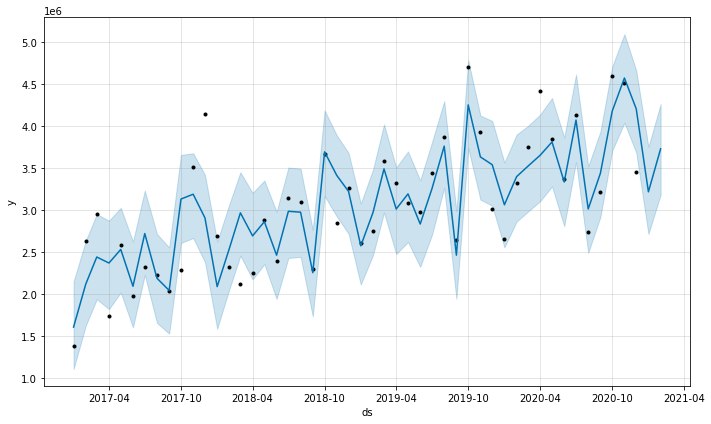

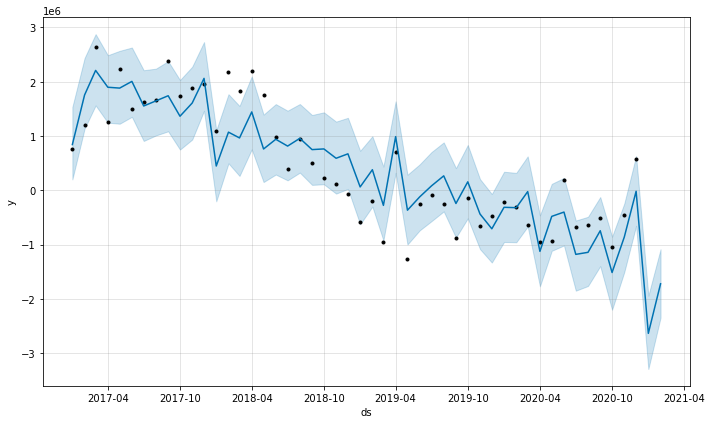

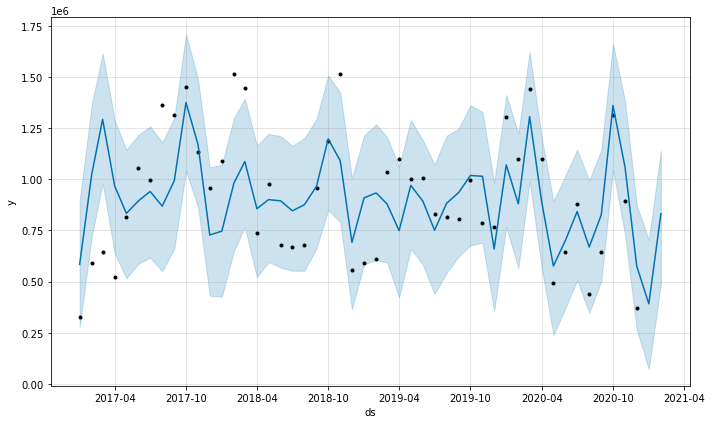

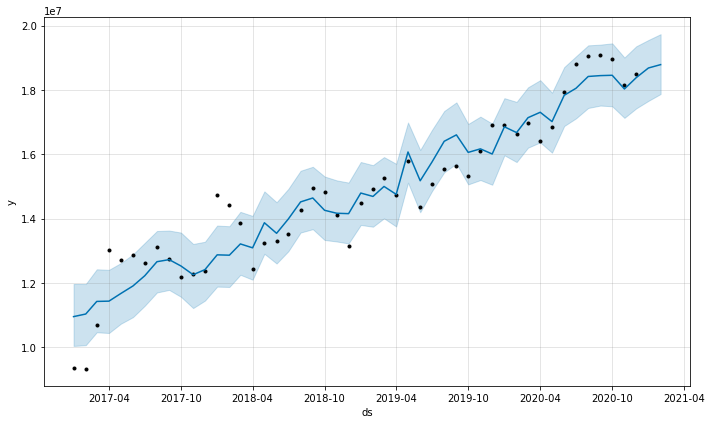

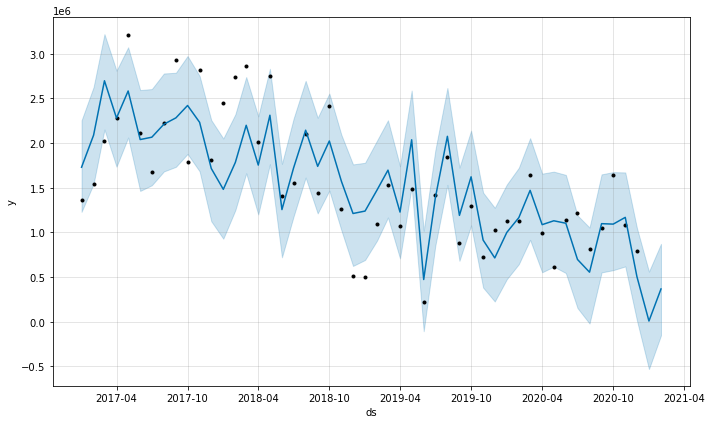

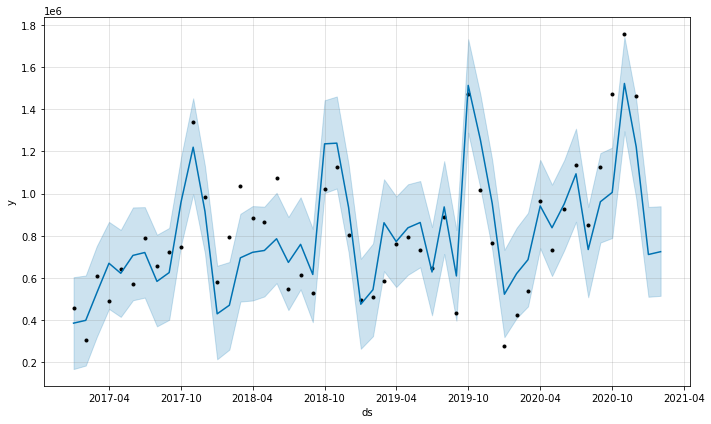

In [101]:
final = pd.DataFrame()
from fbprophet import Prophet
grouped = df_train.groupby('Type')
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet().fit(group)
    future = m.make_future_dataframe(periods = 2,freq = 'MS')
    forecast = m.predict(future)
    fig = m.plot(forecast)
    #ax = fig.gca()
    #ax.set_title(group, size=34)
    #print(forecast.tail())
    forecast = forecast.rename(columns={'yhat': 'yhat_'+g})
    final = pd.merge(final, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

final = final[['yhat_' + g for g in grouped.groups.keys()]]

final.reset_index()


In [85]:
final.reset_index(inplace=True)

In [97]:
y_test = df[df['ds']>'2020-12-01']
y_test = y_test[y_test['Type']=='AMT_ADD']
y_test

,ds,Type,y
288,2021-01-01,AMT_ADD,1784535.78
294,2021-02-01,AMT_ADD,0.00


In [79]:
add = y_test[y_test['Type']=='AMT_ADD']

In [86]:
res=final[['ds','yhat_AMT_ADD']]

In [88]:
y_pred

,ds,yhat_AMT_ADD
48,2021-01-01,3.219006e+06
49,2021-02-01,3.731050e+06


In [100]:
y_pred = res.loc[res['ds'] >'2020-12-01']['yhat_AMT_ADD']

y_pred

48    3.219006e+06
49    3.731050e+06
Name: yhat_AMT_ADD, dtype: float64

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test['y'].values, y_pred.values, squared = False)/y_test['y'].mean()

3.167793818928579